In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [30]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
df = pd.concat([X, y], axis=1)
df.to_csv("../data/heart_disease.csv", index=False)

In [31]:
df = pd.read_csv("../data/heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [33]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [34]:
df["ca"].fillna(df["ca"].median(), inplace=True)
df["thal"].fillna(df["thal"].median(), inplace=True)

C:\Users\compumarts\AppData\Local\Temp\ipykernel_14016\2186288115.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ca"].fillna(df["ca"].median(), inplace=True)
C:\Users\compumarts\AppData\Local\Temp\ipykernel_14016\2186288115.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [35]:
df["ca"] = df["ca"].astype(int)
df["thal"] = df["thal"].astype(int)

In [36]:
df["target"] = (df["num"] > 0).astype(int)
df.drop(columns=["num"], inplace=True)

In [37]:
cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [38]:
from sklearn.preprocessing import StandardScaler
num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

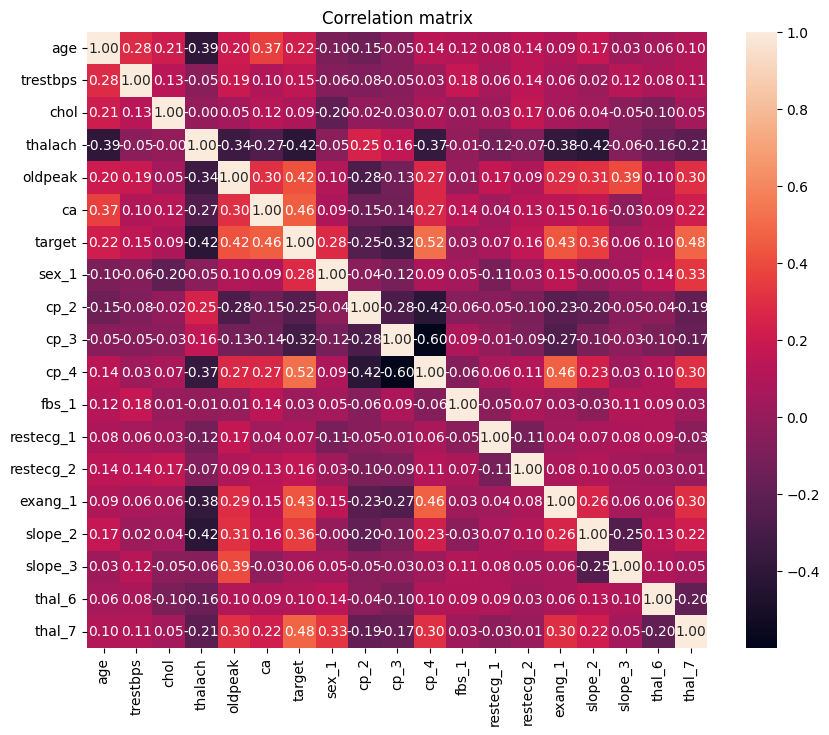

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation matrix')
plt.show()

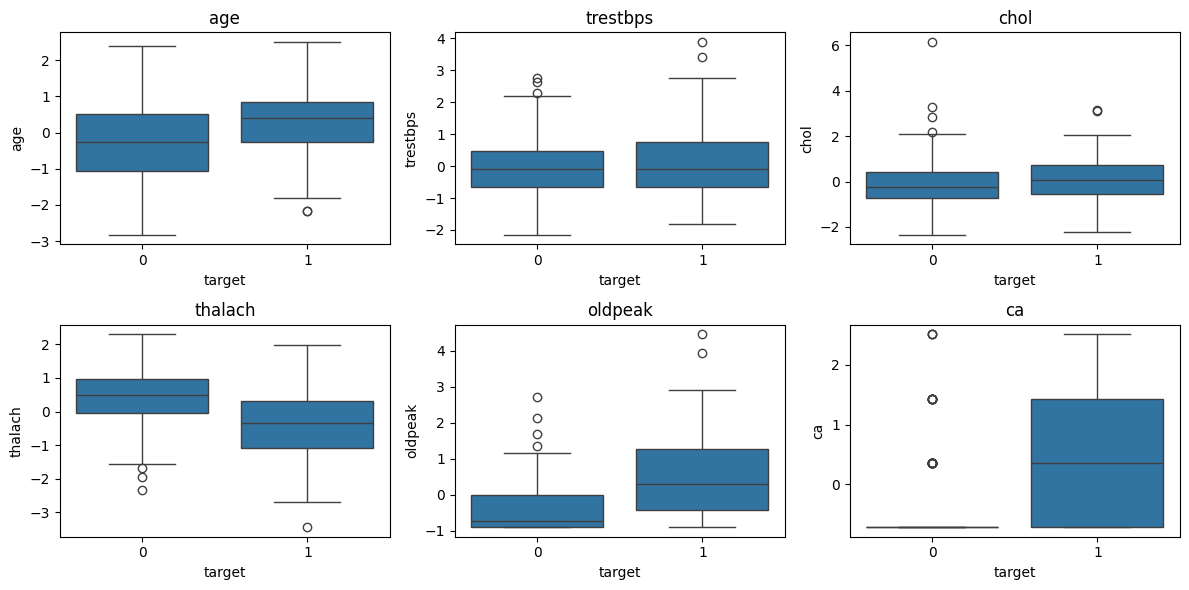

In [40]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x="target", y=col, data=pd.concat([df[num_cols], df["target"]], axis=1))
    plt.title(col)
plt.tight_layout()
plt.show()

In [43]:
df.to_csv("../data/heart_disease_processed.csv", index=False)